# Week 4
## Lecture

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
X = np.sort(X, axis = 0)
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

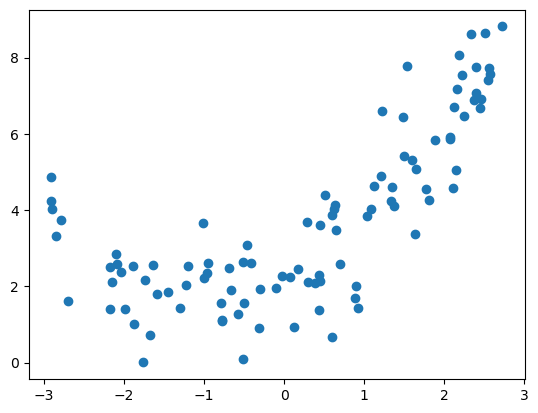

In [6]:
plt.scatter(X, y)

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-2.91300877]
[-2.91300877  8.48562009]


In [10]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.1811172]), array([[0.9687172 , 0.49364877]]))

Above function: $y = 2 + X + \frac{1}{2} X^2$ with noises

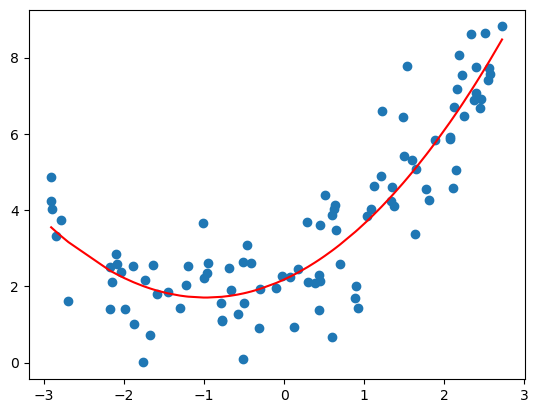

In [16]:
plt.plot(X, 2.1811172 + 0.9687172*X + (X**2)*0.49364877, color = 'red')
plt.scatter(X, y)

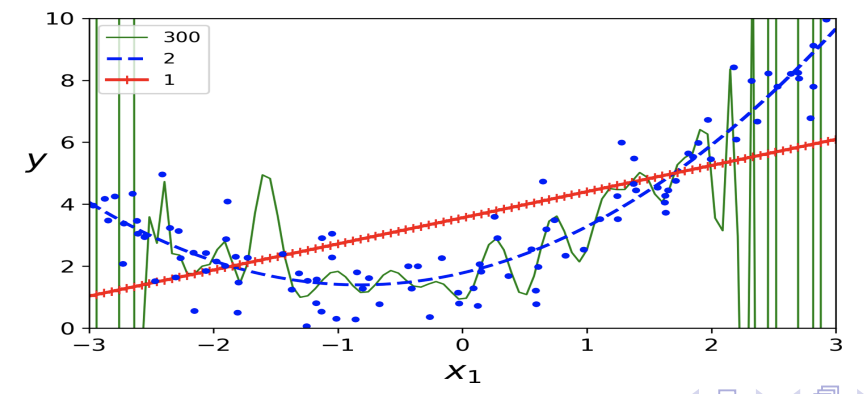
- Green line: 300-degree polynomial regression --> Overfitting --> Only fit the training set, not for prediction
- Red line: Just simple linear regression --> Underfitting
- Blue line: Good fit

3 different generalisation errors:
- Bias (overly simplistic assumptions): not capturing the underlying patterns in the data (using linear instead of quadratic)
- Variance (Excessive sensitivity to small variations): model is too complicated, captures all noises
- Irreducible error (Due to noisiness of the data itself): i.e. Outliers, extreme values

#### Trade off
- Reduce bias, you often increase variance, and vice versa
- Increase a model’s complexity will typically increase its variance and reduce its bias, and vice versa
- **Goal:** Find a balance between creating models that are *too simplistic and overly complex*

#### Training set and validation set
- Use part of the training set for training and part of it for model validation
- Don’t touch the test set until you are ready to launch a model

#### K-fold cross-validation
- The idea is use as many small set (for validating) as possible
- Each model is evaluated once per validation set after it is trained on the rest of the data
- Averaging out the evaluations of model to get a much more accurate measure of its performance
- Drawback: time-consuming, multiplied by the number of validation sets

#### Step
- Split the training set into $k$ distinct subsets called **folds**
- Picking a different fold for each evaluation every time that train on the remaining $k-1$ folds
- Do it $k$ times
- The result is an array containing the $k$ evaluation scores, then calculate the average
- Typical split(Training, Validating, Testing = 80,10,10 or 50,25,25)

In [18]:
from sklearn.model_selection import cross_val_score
mse_scores = cross_val_score(lin_reg, X_poly, y, cv=10, scoring='neg_mean_squared_error')

In [20]:
mse_scores

array([-0.81599279, -0.91000203, -0.73833016, -0.80443876, -0.57978638,
       -1.29960685, -1.69976563, -1.78602473, -1.12783154, -0.32556094])

In [24]:
from sklearn.pipeline import Pipeline
model = Pipeline([
            ("poly_features", PolynomialFeatures(degree=2, include_bias=False)), 
            ("lin_reg", LinearRegression()),
        ])
model.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([2.1811172]), array([[0.9687172 , 0.49364877]]))

In [26]:
cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)

array([-0.81599279, -0.91000203, -0.73833016, -0.80443876, -0.57978638,
       -1.29960685, -1.69976563, -1.78602473, -1.12783154, -0.32556094])

# cross_val_score
- When the model is basically Linear with manual calculation of X_poly, using X_poly
- When the model is combining Poly Transform and Linear in Pipeline, using X only

In [104]:
rse_scores = np.sqrt(-mse_scores)

In [106]:
rse_scores

array([1.41856836, 0.95185881, 1.07531039, 1.15177404, 1.31048688,
       1.28557218, 0.80681042, 0.77516557, 0.80121677, 1.0755985 ])

In [108]:
np.mean(rse_scores) # the smaller the better for 'neg_mean_squared_error'

1.0652361910937236

### Learning curve

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y): #3 arguments
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) # Randomly distribute: 20% for testing, 80% for training
    train_errors, val_errors = [], [] # Blank value to append 
    for m in range(1, len(X_train)): # 1-79th iterations
        model.fit(X_train[:m], y_train[:m]) #1st iteration: 1 obs, ..., 79th iteration: 79 obs
        y_train_predict = model.predict(X_train[:m]) # Validate based on training set, m obs compared
        y_val_predict = model.predict(X_val) # Predict using testing set, (always) 20 obs compared
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict)) #error compared to training set
        val_errors.append(mean_squared_error(y_val, y_val_predict)) #error compared to testing set
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=1, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=1, label="val")
    plt.xlabel("Number of training observations", fontsize=14)
    plt.ylabel("MSE", fontsize=14)

In [4]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
X = np.sort(X, axis = 0)
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [225]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

NameError: name 'LinearRegression' is not defined

### Training data
- zero error for initially, then error goes up until it reaches a plateau (flat/stable)
- zero error for initially (perfectly fit) due there is one 1-2 observations, essentially initial components of linear line
- More instance, gradually higher error, because the model get more noises

### Testing/validating data
- big error initially, then error goes down until it reaches a plateau

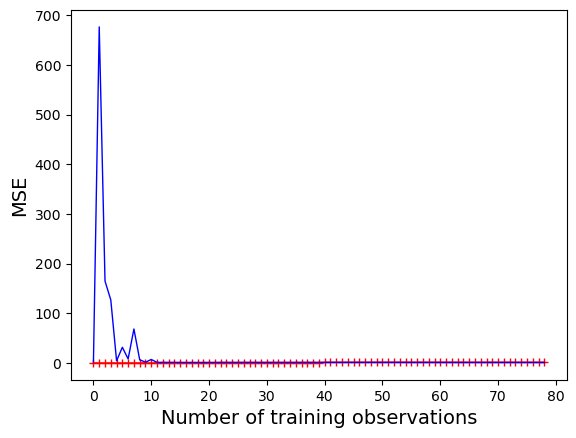

In [213]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10,include_bias=False)), # Put X to change X to 10-degree
    ("lin_reg", LinearRegression()), # Combine new X (poly-form) with y to have linear model
])
plot_learning_curves(polynomial_regression, X, y) # Learning curve of 10-degree

### Compared
- Underfit: both lines come closer to each other **but stay constant**
- Overfit: extremely low in training set
- Good fit: both lines come close to each other and **go does together**

## EXPECTED PREDICTION ERROR (EPE)
- Quantify the average prediction error of a model on **NEW, UNSEEN DATA**
- EPE provides insight on how well the model generalises to new data
- Can help in model selection and hyperparameter tuning
- EPE is often used to evaluate the performance of regression models

### Formula
- True model: $y = f_\theta(x) + \delta = \theta_0+\theta_1 x_1+...+\theta_n x_n + \delta$, with $\delta$ is the random noise
- Predicted model: $\hat{y} = \hat{f}_\hat{\theta}(x) = \hat{\theta_0}+\hat{\theta_1} x_1+...+\hat{\theta_n} x_n$
- EPE of regressor: $EPE = E[L(y, \hat{f}_\hat{\theta}(x))]$, with $L(y, \hat{f}_\hat{\theta}(x))$ is loss function, $L(y, \hat{f}_\hat{\theta}(x)) = (y-\hat{y})^2$ so $$EPE = E[(y-\hat{y})^2]$$

## Regularisation
- Constraining a model to make it simpler and reduce the risk of overfitting
- The more feature used, or the more complex the model is, the more overfitting the model is
- Regularisation adds a penalty to the cost function
- Regularisation put a constrant on the coefficients and weights of our model

### Regularisation by penalising
- Penalising the magnitude of coefficients of features $\theta_i$, while minimising error
- Add a penalty term to the loss function that consists of
  + A complexity parameter, $\lambda$
  + A function with all the coefficients of features, $P(\theta)$
  + i.e $L(y, \hat{f}) + \lambda P(\theta)$
- Optimise the small cost AND also low complexity model
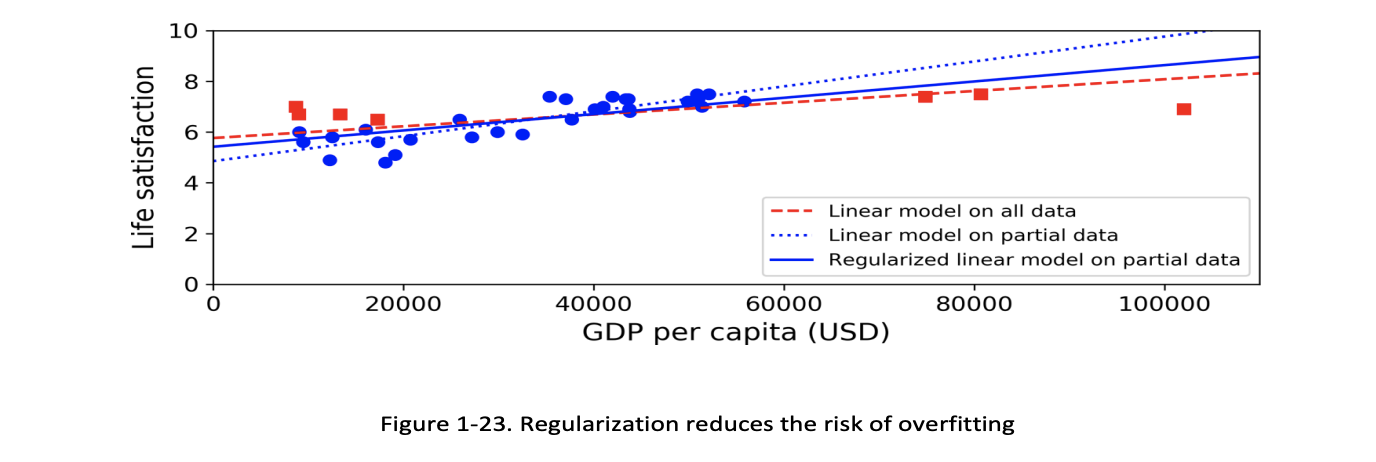

## Regularised Linear Models
- A good way to reduce overfitting is to regularise the model (constrain it by having fewer degrees of freedom)
- Ridge Regression and Lasso Regression are two regularised versions of Linear Regression
- A regularisation term equal to $\alpha \Sigma_{i = 1}^{n}$ is added to the cost function
- This forces the learning algorithm to not only fit the data but also keep the model weight as small as possible
- A regularisation term should only be added to cost function during training
- Once the model is trained, use the unregularised performance measure to evaluate the model's performance

### Ridge Regression
- Ridge Regression cost function $J(\theta) = MSE(\theta) + \alpha \frac{1}{2}\Sigma_{i = 1}^{n}(\theta_i)^2$
- The hyperparameter $\alpha$ controls how much you want to regularise the model
- If $\alpha$ increase, the weights will get closer to zero and the result will become a flat line going through the data's mean
- Closed form equation $\hat{\theta} = (X^T.X+\alpha A)^{-1}.X^T.y$ with $A$ is the identity matrix
- **$\theta$ above does not include intercept**
- **Only need to assign $\alpha$ and the machine will train the model itself**

In [22]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
X = np.sort(X, axis = 0)
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [32]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 0.5, solver = 'cholesky') #MEMORISE THIS ONE
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.90769104]])

In [26]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty = 'l2') #l2 (L2) Ridge
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.91006524])

In [28]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.predict([[1.5]])

array([[4.91045409]])

In [30]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg.fit(X_poly, y)
lin_reg.predict(poly_features.fit_transform([[1.5]]))

array([[4.47036763]])

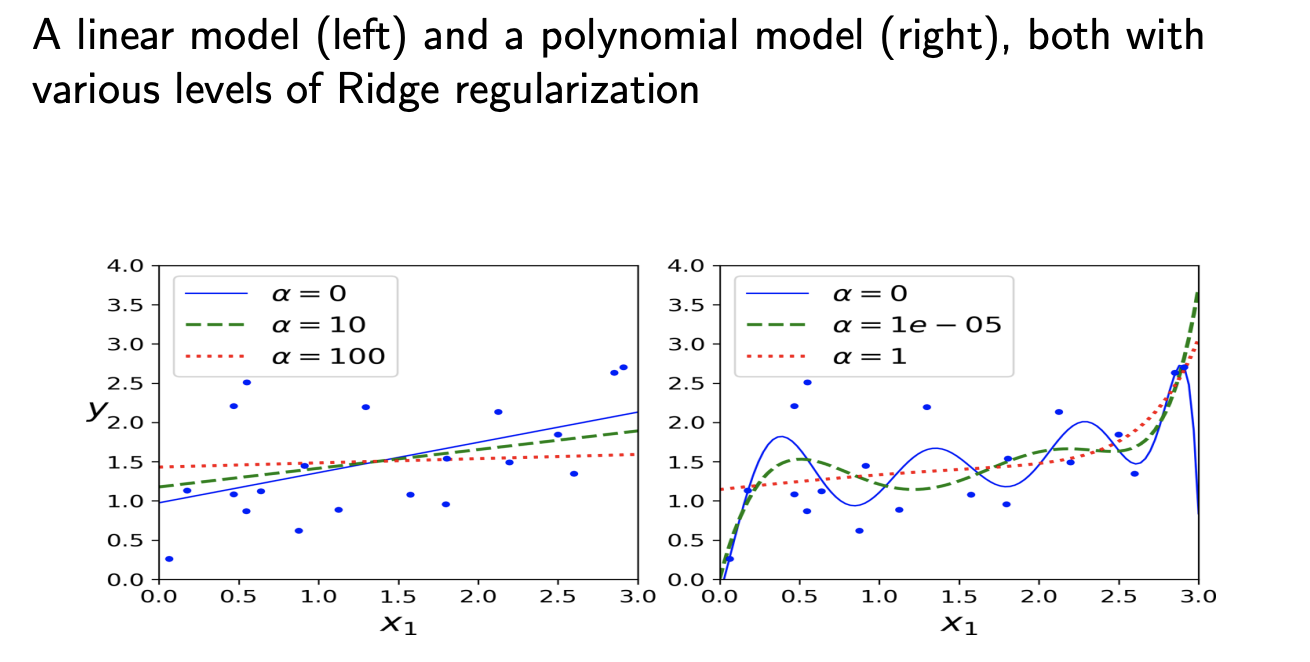

### Lasso Regression
- Main feature: tend to eliminate the weights of the least important features
- Regularistion term is an absolute value
- Cost function: $J(\theta) = MSE(\theta) + \alpha \frac{1}{2}\Sigma_{i = 1}^{n}|\theta_i|$

In [34]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.39458841])

In [36]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty = 'l1') #l1 (L1) Lasso
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.85851998])

In [38]:
print(X[73], y[73])
print(X[74], y[74])

[1.38270608] [2.90985888]
[1.59806756] [4.60864096]


### Ridge
- includes all (or none) of the features
- perform better in prediction
- prevent overfitting, but not useful for data with huge dimensions (big data)
- for data with highly correlated features, generally works well, coefficients will be distributed among them
### Lasso
- performs feature selections, some coefficients become zero
- solution is sparse, useful for data with huge dimensions
- arbitrarily select any one feature among the correlated ones, chosen variable changes with model parameter

## Early Stopping
- A different way to regularise iterative learning algorithms such as DF is to stop training as soon as the validation error reaches a minimum
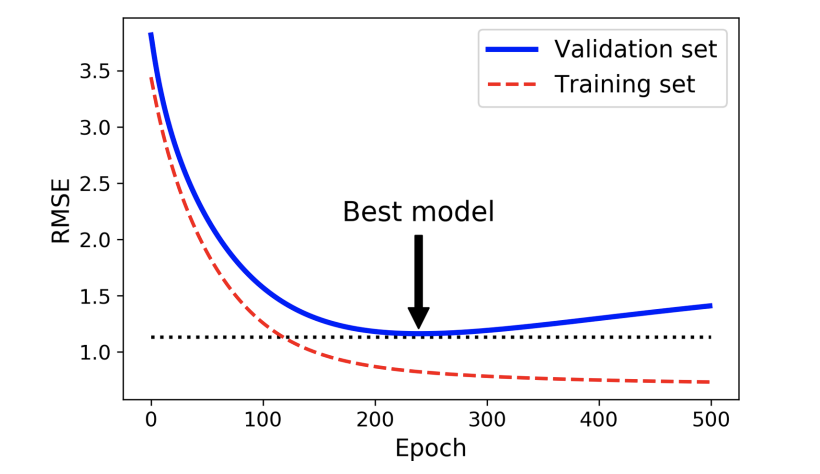
- After a while the validation error stops decreasing and starts increase back again
- This indicates that the model starts to overfit the training data
- With early stopping, we can stop when the validation error reaches the minimum
- Simple and efficient

# TURORIAL

In [28]:
import numpy as np
import pandas as pd

In [38]:
data = pd.read_csv("bloodpressure.csv")
data.dtypes

ID-NUMBER          int64
AGE                int64
ED-LEVEL           int64
SMOKING STATUS     int64
EXERCISE           int64
WEIGHT             int64
SERUM-CHOL         int64
SYSTOLIC           int64
IQ                 int64
SODIUM             int64
GENDER            object
MARITAL-STATUS    object
dtype: object

In [40]:
label = data["SYSTOLIC"]

In [42]:
data = data.drop(["ID-NUMBER", "SYSTOLIC"], axis=1)

In [44]:
data = pd.get_dummies(data, drop_first=True)
# get dummies for objects columns
# drop_first = True : only use (k-1) column if the original column has k values (k > 1)

In [46]:
data

,AGE,ED-LEVEL,SMOKING STATUS,EXERCISE,WEIGHT,SERUM-CHOL,IQ,SODIUM,GENDER_M,MARITAL-STATUS_M,MARITAL-STATUS_S,MARITAL-STATUS_W
0,27,2,1,1,120,193,118,136,False,True,False,False
1,18,1,0,1,145,210,105,137,True,False,True,False
2,32,2,0,0,118,196,115,135,False,True,False,False
3,24,2,0,1,162,208,108,142,True,True,False,False
4,19,1,2,0,106,188,106,133,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
95,53,0,0,0,149,232,103,141,False,True,False,False
96,63,0,1,0,192,193,95,147,True,True,False,False
97,74,1,0,0,162,247,99,151,False,False,False,True
98,35,2,0,1,151,251,113,145,False,True,False,False


In [56]:
alphas = np.arange(0, 4, 0.1)

In [60]:
from sklearn.linear_model import Ridge

In [72]:
ridge_score = []

In [74]:
for alpha in alphas: # 40 iterations for alphas
    ridge_reg = Ridge(alpha = alpha, solver = "cholesky") # Update new alpha
    scores = cross_val_score(ridge_reg, data, label, cv = 10, scoring = "neg_mean_squared_error") 
    # Result: 10 score of the model in tersm of neg_mean_squared_error
    ridge_score.append(np.sqrt(np.mean(-scores)))

In [217]:
np.argmin(ridge_score)   # Index = 9

9

In [219]:
alphas[np.argmin(ridge_score)] # or alphas[9] --> Best alpha

0.9

In [76]:
cross_val_score(ridge_reg, data, label, cv = 10, scoring = "neg_mean_squared_error") 

array([-83.67523257, -64.67880258, -70.80455723, -37.48775418,
       -47.29403707, -51.7307641 , -28.32419123, -74.67342736,
       -69.62628801, -57.29716468])

In [78]:
np.mean(-cross_val_score(ridge_reg, data, label, cv = 10, scoring = "neg_mean_squared_error") )

58.55922190111262